In [2]:
import numpy as np
import pandas as pd
import os
import gzip
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Предобработка логов

In [418]:
# vibo: папка где лежат сырые логи
# vibo: ВАЖНО!!! ФАЙЛЫ В ПАПКЕ ДОЛЖНЫ БЫТЬ ОТСОРТИРОВАНЫ ОТ СТАРЫХ К НОВЫМ
# (latest.log...ok - должен прочитаться последним)
link = '/content/drive/MyDrive/minecraft/logs/'

In [419]:
# vibo: задаем имена установленных плагинов
plug_names = ['WorldEdit', 'WorldGuard', 'HolographicDisplays']

In [420]:
# vibo: лист для логов
row_logs = []

# vibo: читаем именя файлов в папке (адрес передан в link)
for root, dirs, files in os.walk(link):  
    for filename in files:
      # vibo: в папке файлы двух видов *log.gz и *.log (один последний)
      # vibo: обрабатываем файлы *log.gz
      if filename.endswith("gz"):
        # vibo: создаем путь до файла
        path = link + filename
        # vibo: разархивируем и читаем с учетом кодировки
        with gzip.open(path, 'rb') as f:
          with io.TextIOWrapper(f, encoding='utf-8') as decoder:
            # vibo: в content - полное содержимое одного лога
            content = decoder.read()
            # vibo: обрезаем перенос строк
            for i in content.split('\n'):
              # vibo: выделяем из имени файла дату и добавляем ее в начало строки
              row_logs.append(filename[:-9] + ' ' + i)
              # vibo: сохраняем крайнюю дату она понадобится ниже для последнего файла без даты
              last_date = filename[:-9]
        print(f'{filename}...ok' )

      # vibo: это обработка файла latest.log
      else:
        with open(link + 'latest.log', encoding="UTF-8") as file_in: 
            for line in file_in:
                messege = line.rstrip("\n")
                row_logs.append(last_date + ' ' + messege)
        print(f'{filename}...ok' )

2023-02-13-1.log.gz...ok
2023-02-13-2.log.gz...ok
2023-02-13-3.log.gz...ok
2023-02-13-4.log.gz...ok
2023-02-14-1.log.gz...ok
2023-02-14-2.log.gz...ok
2023-02-14-3.log.gz...ok
2023-02-17-1.log.gz...ok
2023-03-03-1.log.gz...ok
2023-03-03-2.log.gz...ok
2023-03-03-3.log.gz...ok
2023-03-04-1.log.gz...ok
2023-03-04-2.log.gz...ok
2023-03-04-3.log.gz...ok
2023-03-04-4.log.gz...ok
2023-03-04-5.log.gz...ok
2023-03-05-1.log.gz...ok
2023-03-05-2.log.gz...ok
2023-03-05-3.log.gz...ok
2023-03-06-1.log.gz...ok
2023-03-06-2.log.gz...ok
2023-03-06-3.log.gz...ok
2023-03-06-4.log.gz...ok
latest.log...ok


In [421]:
# vibo: проверяем последнюю строку
row_logs[-1]

'2023-03-06 [21:02:46] [Server thread/INFO]: amogoos left the game'

In [422]:
# vibo: делаем датафрейм
row_logs = pd.DataFrame({
    'row_logs': row_logs
})
row_logs

,row_logs
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...
4,2023-02-13
...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...


In [ ]:
# vibo: выделяем дату
row_logs['data'] = row_logs['row_logs'].map(lambda x: x[:11])
# vibo: сохраняем в отдельный столбец оставшиеся данные
row_logs['row_logs_split_0'] = row_logs['row_logs'].map(lambda x: x[11:])
row_logs

,row_logs,data,row_logs_split_0
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...
4,2023-02-13,2023-02-13,
...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...


In [ ]:
# vibo: проверяем длину каждой строки, где-то есть 0
row_logs['__len__'] = row_logs['row_logs_split_0'].map(lambda x: len(x))
row_logs

,row_logs,data,row_logs_split_0,__len__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,60
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,85
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,53
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,117
4,2023-02-13,2023-02-13,,0
...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,56
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,168
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,89
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,70


In [ ]:
# vibo: удаляем 0
row_logs = row_logs[row_logs['__len__'] != 0]
row_logs

,row_logs,data,row_logs_split_0,__len__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,60
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,85
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,53
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,117
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,60
...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,56
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,168
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,89
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,70


In [ ]:
# vibo: выделяем время
row_logs['time'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[0][1:])
# vibo: проверяем длину строки в столбце времени
row_logs['__len__'] = row_logs['time'].map(lambda x: len(x))
row_logs

<ipython-input-47-69937498586c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['time'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[0][1:])
<ipython-input-47-69937498586c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['__len__'] = row_logs['time'].map(lambda x: len(x))


,row_logs,data,row_logs_split_0,__len__,time
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03
...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46


In [ ]:
# vibo: находим нестандартный лог без времени
row_logs[row_logs['__len__'] != 8]

,row_logs,data,row_logs_split_0,__len__,time
1600,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1602,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1605,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1607,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1610,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1612,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1615,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1617,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1626,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1628,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с


In [ ]:
# vibo: сохраняем индексы строк без времени
list_new_log = row_logs[row_logs['__len__'] != 8].index
list_new_log

Int64Index([1600, 1602, 1605, 1607, 1610, 1612, 1615, 1617, 1626, 1628], dtype='int64')

In [ ]:
# vibo: оставляем только время
row_logs['time'] = row_logs[row_logs['__len__'] == 8]['time']
row_logs

<ipython-input-50-e4e40ebc16c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['time'] = row_logs[row_logs['__len__'] == 8]['time']


,row_logs,data,row_logs_split_0,__len__,time
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03
...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46


In [ ]:
# vibo: логи без времени записываем в столбец с системными сообщениями
row_logs['serv_mess'] = row_logs[row_logs.index.isin(list_new_log)]['row_logs_split_0']
row_logs

<ipython-input-51-6c5656879e36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['serv_mess'] = row_logs[row_logs.index.isin(list_new_log)]['row_logs_split_0']


,row_logs,data,row_logs_split_0,__len__,time,serv_mess
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,NaN
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,NaN
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,NaN
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,NaN
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,NaN
...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,NaN
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,NaN
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,NaN
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,NaN


In [ ]:
# vibo: оставляем только строки с временем
row_logs['row_logs_split_0'] = row_logs[row_logs["__len__"] == 8]['row_logs_split_0']
row_logs

<ipython-input-52-70c841e765ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['row_logs_split_0'] = row_logs[row_logs["__len__"] == 8]['row_logs_split_0']


,row_logs,data,row_logs_split_0,__len__,time,serv_mess
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,NaN
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,NaN
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,NaN
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,NaN
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,NaN
...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,NaN
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,NaN
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,NaN
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,NaN


In [ ]:
# vibo: сохраняем часть лога без времени в отдельный столбце
row_logs['row_logs_split_1'] = row_logs[row_logs['__len__'] == 8]['row_logs_split_0'].map(lambda x: x.split('] [')[1])

row_logs

<ipython-input-53-77a7a4fff224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['row_logs_split_1'] = row_logs[row_logs['__len__'] == 8]['row_logs_split_0'].map(lambda x: x.split('] [')[1])


,row_logs,data,row_logs_split_0,__len__,time,serv_mess,row_logs_split_1
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,NaN,ServerMain/INFO]: Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,NaN,ServerMain/ERROR]: Failed to load properties f...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,NaN,ServerMain/WARN]: Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,NaN,ServerMain/INFO]: You need to agree to the EUL...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,NaN,ServerMain/INFO]: Building unoptimized datafixer
...,...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,NaN,Server thread/INFO]: amogoos joined the game
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,NaN,Server thread/INFO]: amogoos[/[0:0:0:0:0:0:0:1...
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,NaN,Server thread/INFO]: amogoos has completed the...
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,NaN,Server thread/INFO]: amogoos lost connection: ...


In [ ]:
# vibo: выделяем стандартные сообщения сервера, остальныю часть сохраняем в отдельный столбец
row_logs['serv_teg'] = row_logs['row_logs_split_1'].dropna().map(lambda x: x.split(']:')[0])
row_logs['row_logs_split_2'] = row_logs['row_logs_split_1'].dropna().map(lambda x: x.split(']:')[1])

row_logs

<ipython-input-54-37c0d8754084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['serv_teg'] = row_logs['row_logs_split_1'].dropna().map(lambda x: x.split(']:')[0])
<ipython-input-54-37c0d8754084>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['row_logs_split_2'] = row_logs['row_logs_split_1'].dropna().map(lambda x: x.split(']:')[1])


,row_logs,data,row_logs_split_0,__len__,time,serv_mess,row_logs_split_1,serv_teg,row_logs_split_2
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,NaN,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,NaN,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,NaN,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,NaN,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,NaN,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer
...,...,...,...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,NaN,Server thread/INFO]: amogoos joined the game,Server thread/INFO,amogoos joined the game
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,NaN,Server thread/INFO]: amogoos[/[0:0:0:0:0:0:0:1...,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,NaN,Server thread/INFO]: amogoos has completed the...,Server thread/INFO,amogoos has completed the challenge [Serious ...
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,NaN,Server thread/INFO]: amogoos lost connection: ...,Server thread/INFO,amogoos lost connection: Disconnected


In [ ]:
# vibo: заполняем именя плагинов для сообщений
row_logs['plug'] = row_logs['row_logs_split_2'].dropna().map(lambda x: [y for y in plug_names if y in x])
# vibo: делаем вспомогательный столбец, если плагин есть 1, нет 0
row_logs['__plug__'] = row_logs['plug'].dropna().map(lambda x: 1 if len(x) == 1 else 0)

row_logs

<ipython-input-55-b8062a5fd94a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['plug'] = row_logs['row_logs_split_2'].dropna().map(lambda x: [y for y in plug_names if y in x])
<ipython-input-55-b8062a5fd94a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['__plug__'] = row_logs['plug'].dropna().map(lambda x: 1 if len(x) == 1 else 0)


,row_logs,data,row_logs_split_0,__len__,time,serv_mess,row_logs_split_1,serv_teg,row_logs_split_2,plug,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,NaN,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,[],0.0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,NaN,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,[],0.0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,NaN,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,[],0.0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,NaN,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,[],0.0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,NaN,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,[],0.0
...,...,...,...,...,...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,NaN,Server thread/INFO]: amogoos joined the game,Server thread/INFO,amogoos joined the game,[],0.0
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,NaN,Server thread/INFO]: amogoos[/[0:0:0:0:0:0:0:1...,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,[],0.0
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,NaN,Server thread/INFO]: amogoos has completed the...,Server thread/INFO,amogoos has completed the challenge [Serious ...,[],0.0
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,NaN,Server thread/INFO]: amogoos lost connection: ...,Server thread/INFO,amogoos lost connection: Disconnected,[],0.0


In [ ]:
# vibo: заменил [] на NaN
row_logs['plug'] = row_logs[row_logs['__plug__'] == 1]['plug'].map(lambda x: x[0])

row_logs

<ipython-input-56-1e1abf2d818e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['plug'] = row_logs[row_logs['__plug__'] == 1]['plug'].map(lambda x: x[0])


,row_logs,data,row_logs_split_0,__len__,time,serv_mess,row_logs_split_1,serv_teg,row_logs_split_2,plug,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,NaN,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0.0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,NaN,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,0.0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,NaN,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,NaN,0.0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,NaN,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,0.0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,NaN,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,NaN,Server thread/INFO]: amogoos joined the game,Server thread/INFO,amogoos joined the game,NaN,0.0
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,NaN,Server thread/INFO]: amogoos[/[0:0:0:0:0:0:0:1...,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,0.0
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,NaN,Server thread/INFO]: amogoos has completed the...,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,0.0
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,NaN,Server thread/INFO]: amogoos lost connection: ...,Server thread/INFO,amogoos lost connection: Disconnected,NaN,0.0


In [ ]:
# vibo: основные логи сервера в отдельный столбец
row_logs['serv_mess'] = row_logs[row_logs['__plug__'] == 0]['row_logs_split_2']

row_logs

<ipython-input-57-20a7804a90ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['serv_mess'] = row_logs[row_logs['__plug__'] == 0]['row_logs_split_2']


,row_logs,data,row_logs_split_0,__len__,time,serv_mess,row_logs_split_1,serv_teg,row_logs_split_2,plug,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47,Building unoptimized datafixer,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0.0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48,Failed to load properties from file: server.p...,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,0.0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48,Failed to load eula.txt,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,NaN,0.0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48,You need to agree to the EULA in order to run...,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,0.0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03,Building unoptimized datafixer,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5101,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos joine...,8,20:21:46,amogoos joined the game,Server thread/INFO]: amogoos joined the game,Server thread/INFO,amogoos joined the game,NaN,0.0
5102,2023-03-06 [20:21:46] [Server thread/INFO]: am...,2023-03-06,[20:21:46] [Server thread/INFO]: amogoos[/[0:0...,8,20:21:46,amogoos[/[0:0:0:0:0:0:0:1,Server thread/INFO]: amogoos[/[0:0:0:0:0:0:0:1...,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,0.0
5103,2023-03-06 [20:57:04] [Server thread/INFO]: am...,2023-03-06,[20:57:04] [Server thread/INFO]: amogoos has c...,8,20:57:04,amogoos has completed the challenge [Serious ...,Server thread/INFO]: amogoos has completed the...,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,0.0
5104,2023-03-06 [21:02:46] [Server thread/INFO]: am...,2023-03-06,[21:02:46] [Server thread/INFO]: amogoos lost ...,8,21:02:46,amogoos lost connection: Disconnected,Server thread/INFO]: amogoos lost connection: ...,Server thread/INFO,amogoos lost connection: Disconnected,NaN,0.0


In [ ]:
# vibo: логи плагинов сложил в отдельный столбец
row_logs['plug_mess'] = row_logs[row_logs['__plug__'] == 1]['row_logs_split_2'].map(lambda x: x[(x.find(']')) + 2:])

row_logs[['time', 'serv_teg', 'serv_mess', 'plug', 'plug_mess']]

<ipython-input-58-a495051ecd83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['plug_mess'] = row_logs[row_logs['__plug__'] == 1]['row_logs_split_2'].map(lambda x: x[(x.find(']')) + 2:])


,time,serv_teg,serv_mess,plug,plug_mess
0,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...
5101,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN
5102,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN
5103,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN
5104,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN


In [ ]:
# vibo: сохраняем предобработанный лог
row_logs[['data', 'time', 'serv_teg', 'serv_mess', 'plug', 'plug_mess']].to_csv('/content/drive/MyDrive/minecraft/logs.csv', index=False)

# Анализ

In [547]:
# vibo: читаем предобработанный лог
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv')

In [548]:
# vibo: переименуем столбец
data_logs = data_logs.rename(columns={"plug": "plug_name"})
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN


In [549]:
# vibo: смотрим пропуски
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5083 entries, 0 to 5082
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       5083 non-null   object
 1   time       5073 non-null   object
 2   serv_teg   5073 non-null   object
 3   serv_mess  4836 non-null   object
 4   plug_name  237 non-null    object
 5   plug_mess  231 non-null    object
dtypes: object(6)
memory usage: 238.4+ KB


В логе было несколько сообщений без времени, что странно.

In [550]:
# vibo: сводная статистика
data_logs.describe()

,data,time,serv_teg,serv_mess,plug_name,plug_mess
count,5083,5073,5073,4836,237,231
unique,7,994,33,725,3,50
top,2023-03-06,21:13:39,Server thread/INFO,Preparing spawn area: 0%,WorldEdit,
freq,1424,115,4071,518,121,24


Видно, что логи делались 7 дней, основные сообщения сервера (serv_teg) надо разбить еще. Плагина 3, но это и так понятно, т.к. мы их забили в начале блокнота.

In [551]:
# vibo: сохраним хронологию сообщений
df_count_serv_mes = data_logs["data"].value_counts().to_frame(name='count_serv_mes').sort_index()
df_count_serv_mes

,count_serv_mes
2023-02-13,568
2023-02-14,360
2023-02-17,282
2023-03-03,604
2023-03-04,1018
2023-03-05,827
2023-03-06,1424


In [552]:
# vibo: суммарное количество сообщений
data_logs["data"].count().sum()

5083

In [553]:
# vibo: дни наблюдения
list(df_count_serv_mes.index)

['2023-02-13 ',
 '2023-02-14 ',
 '2023-02-17 ',
 '2023-03-03 ',
 '2023-03-04 ',
 '2023-03-05 ',
 '2023-03-06 ']

In [554]:
# vibo: количество дней наблюдения
len(list(df_count_serv_mes.index))

7

Визуализируем данные

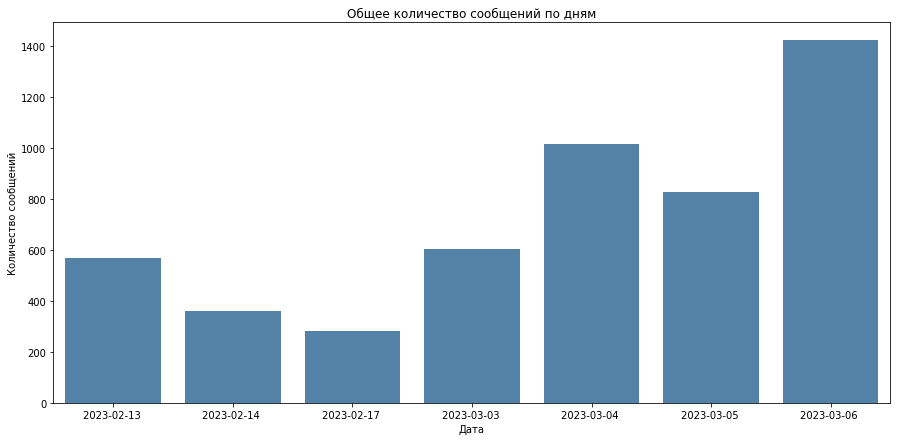

In [555]:
# график по дням
plt.figure(figsize=(15, 7))
sns.barplot(x=df_count_serv_mes.index, y='count_serv_mes', data=df_count_serv_mes, color='steelblue')

plt.title('Общее количество сообщений по дням')
plt.xlabel('Дата')
plt.ylabel('Количество сообщений')
plt.show()

## Основные сообщения сервера

```
# This is formatted as code
```



In [556]:
data_logs["serv_teg"].value_counts()

Server thread/INFO              4071
Server thread/WARN               126
Worker-Main-4/INFO               125
Worker-Main-3/INFO               123
Worker-Main-1/INFO                96
Worker-Main-5/INFO                95
Worker-Main-2/INFO                94
Worker-Main-6/INFO                84
Worker-Main-7/INFO                83
ServerMain/INFO                   69
User Authenticator #1/INFO        18
WorldGuard Region I/O/INFO        11
User Authenticator #2/INFO         9
User Authenticator #7/INFO         7
User Authenticator #6/INFO         7
User Authenticator #5/INFO         7
User Authenticator #3/INFO         7
User Authenticator #4/INFO         7
Async Chat Thread - #0/INFO        5
Async Chat Thread - #2/INFO        5
User Authenticator #8/INFO         5
Async Chat Thread - #10/INFO       3
Async Chat Thread - #6/INFO        3
User Authenticator #9/INFO         3
User Authenticator #10/INFO        2
User Authenticator #12/INFO        1
User Authenticator #14/INFO        1
U

Из информации выше видим, что ее можно еще сгруппировать и выделить в отельные слобцы.

In [557]:
data_logs["serv_teg_info"] = data_logs["serv_teg"].dropna().map(lambda x: x.split('/')[0])
data_logs["serv_teg_TEG"] = data_logs["serv_teg"].dropna().map(lambda x: x.split('/')[1])
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_info,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,ServerMain,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ServerMain,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,ServerMain,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,ServerMain,INFO
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,ServerMain,INFO
...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,Server thread,INFO
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,Server thread,INFO
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,Server thread,INFO
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,Server thread,INFO


In [558]:
data_logs["serv_teg_info"].value_counts()

Server thread              4197
Worker-Main-4               125
Worker-Main-3               123
Worker-Main-1                96
Worker-Main-5                95
Worker-Main-2                94
Worker-Main-6                84
Worker-Main-7                83
ServerMain                   71
User Authenticator #1        18
WorldGuard Region I          11
User Authenticator #2         9
User Authenticator #3         7
User Authenticator #7         7
User Authenticator #5         7
User Authenticator #6         7
User Authenticator #4         7
User Authenticator #8         5
Async Chat Thread - #0        5
Async Chat Thread - #2        5
Async Chat Thread - #6        3
Async Chat Thread - #10       3
User Authenticator #9         3
User Authenticator #10        2
Async Chat Thread - #4        1
User Authenticator #11        1
User Authenticator #12        1
User Authenticator #13        1
User Authenticator #14        1
Async Chat Thread - #8        1
Name: serv_teg_info, dtype: int64

In [559]:
data_logs["serv_teg_TEG"].value_counts()

INFO     4934
WARN      127
O          11
ERROR       1
Name: serv_teg_TEG, dtype: int64

По `/` не разрезать из-за `WorldGuard Region I/O/INFO`, который мешает.

In [560]:
# vibo: удаляем столбцы
data_logs = data_logs.drop(['serv_teg_info', 'serv_teg_TEG'], axis=1)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN


### info, warn и error

Выше было видно, что тега всего три - `INFO`, `WARN` и `ERROR`, выделим их в отдельный столбец.

In [561]:
# vibo: проставили True, там где есть INFO
data_logs['serv_teg_TEG_INFO'] = data_logs['serv_teg'].dropna().map(lambda x: 'INFO' in x)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,True
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,False
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,False
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,True
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,True
...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,True
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,True
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,True
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,True


In [562]:
# vibo: нишли индексы строк с INFO
ind_INFO = data_logs[data_logs['serv_teg_TEG_INFO'] == True].index
ind_INFO

Int64Index([   0,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082],
           dtype='int64', length=4945)

In [563]:
# vibo: заменили True на INFO
data_logs['serv_teg_TEG_INFO'] = data_logs[data_logs.index.isin(ind_INFO)]['serv_teg_TEG_INFO'].map(lambda x: 'INFO')
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO


In [564]:
# vibo: делаем тоже самое для WARN и ERROR
data_logs['serv_teg_TEG_WARN'] = data_logs[data_logs['serv_teg'] != 'INFO']['serv_teg'].dropna().map(lambda x: 'WARN' in x)
ind_WARN = data_logs[data_logs['serv_teg_TEG_WARN'] == True].index
data_logs['serv_teg_TEG_WARN'] = data_logs[data_logs.index.isin(ind_WARN)]['serv_teg_TEG_WARN'].map(lambda x: 'WARN')

data_logs['serv_teg_TEG_ERROR'] = data_logs['serv_teg'].dropna().map(lambda x: 'ERROR' in x)
ind_ERROR = data_logs[data_logs['serv_teg_TEG_ERROR'] == True].index
data_logs['serv_teg_TEG_ERROR'] = data_logs[data_logs.index.isin(ind_ERROR)]['serv_teg_TEG_ERROR'].map(lambda x: 'ERROR')

data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG_ERROR
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,NaN,NaN


In [565]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN', 'serv_teg_TEG_ERROR']] = data_logs[['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN', 'serv_teg_TEG_ERROR']].ffill(axis=1)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG_ERROR
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,INFO,INFO
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,INFO,INFO
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,INFO,INFO
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,INFO,INFO
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,INFO,INFO


In [566]:
# vibo: переименуем столбец
data_logs = data_logs.rename(columns={"serv_teg_TEG_ERROR": "serv_teg_TEG"})
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,INFO,INFO
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,INFO,INFO
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,INFO,INFO
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,INFO,INFO
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,INFO,INFO


In [567]:
# vibo: удаляем промежуточные столбцы
data_logs = data_logs.drop(['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN'], axis=1)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO


In [568]:
serv_teg_TEG = data_logs["serv_teg_TEG"].value_counts().to_frame()
serv_teg_TEG.agg('sum', axis=0)

serv_teg_TEG    5073
dtype: int64

In [569]:
serv_teg_TEG.index

Index(['INFO', 'WARN', 'ERROR'], dtype='object')

In [570]:
# vibo: итоговое распределение тегов
serv_teg_TEG['serv_teg_TEG_%'] = serv_teg_TEG['serv_teg_TEG'] * 100 / serv_teg_TEG['serv_teg_TEG'].sum()
serv_teg_TEG['serv_teg_TEG_%'] = serv_teg_TEG['serv_teg_TEG_%'].round(2)
serv_teg_TEG

,serv_teg_TEG,serv_teg_TEG_%
INFO,4945,97.48
WARN,127,2.50
ERROR,1,0.02


In [571]:
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO


In [572]:
# vibo: теперь выделим из serv_teg - остальную информацию
# vibo: можно было также выделять теги
data_logs['serv_teg_INF'] = data_logs['serv_teg'].dropna().map(lambda x: x[::-1].split('/')[1:])
data_logs['serv_teg_INF'] = data_logs['serv_teg_INF'].dropna().map(lambda x: ('/'.join(x))[::-1])
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain
...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread


In [573]:
data_logs['serv_teg_INF'].value_counts()

Server thread              4197
Worker-Main-4               125
Worker-Main-3               123
Worker-Main-1                96
Worker-Main-5                95
Worker-Main-2                94
Worker-Main-6                84
Worker-Main-7                83
ServerMain                   71
User Authenticator #1        18
WorldGuard Region I/O        11
User Authenticator #2         9
User Authenticator #3         7
User Authenticator #7         7
User Authenticator #5         7
User Authenticator #6         7
User Authenticator #4         7
User Authenticator #8         5
Async Chat Thread - #0        5
Async Chat Thread - #2        5
Async Chat Thread - #6        3
Async Chat Thread - #10       3
User Authenticator #9         3
User Authenticator #10        2
Async Chat Thread - #4        1
User Authenticator #11        1
User Authenticator #12        1
User Authenticator #13        1
User Authenticator #14        1
Async Chat Thread - #8        1
Name: serv_teg_INF, dtype: int64

#### Ошибки на сервере

In [581]:
data_logs[data_logs['serv_teg_TEG'] == 'ERROR'][['data', 'time', 'serv_teg', 'serv_mess', 'serv_teg_TEG']]

,data,time,serv_teg,serv_mess,serv_teg_TEG
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,ERROR


#### Предупреждения на сервере

In [585]:
data_logs[data_logs['serv_teg_TEG'] == 'WARN'][['data', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

,data,time,serv_teg_TEG,serv_teg_INF,serv_mess
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt
246,2023-02-13,21:36:46,WARN,Server thread,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
247,2023-02-13,21:36:46,WARN,Server thread,The server will make no attempt to authentica...
248,2023-02-13,21:36:46,WARN,Server thread,While this makes the game possible to play wi...
249,2023-02-13,21:36:46,WARN,Server thread,"To change this, set ""online-mode"" to ""true"" i..."
...,...,...,...,...,...
5014,2023-03-06,18:28:56,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5025,2023-03-06,18:33:46,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5036,2023-03-06,18:40:51,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5063,2023-03-06,20:14:40,WARN,Server thread,amogoos dropped their items too quickly!


In [586]:
data_logs[data_logs['serv_teg_TEG'] == 'WARN'][['data', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']].describe()

,data,time,serv_teg_TEG,serv_teg_INF,serv_mess
count,127,127,127,127,127
unique,7,62,1,2,47
top,2023-03-06,14:58:50,WARN,Server thread,The server will make no attempt to authentica...
freq,35,4,127,126,21


Предупреждение в группе ServerMain

In [587]:
data_logs[(data_logs['serv_teg_TEG'] == 'WARN') & (data_logs['serv_teg_INF'] == 'ServerMain')][['data', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

,data,time,serv_teg_TEG,serv_teg_INF,serv_mess
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt


Предупреждения в группе Server thread

In [588]:
data_logs[(data_logs['serv_teg_TEG'] == 'WARN') & (data_logs['serv_teg_INF'] == 'Server thread')][['data', 'time', 'serv_teg_TEG', 'serv_teg_INF', 'serv_mess']]

,data,time,serv_teg_TEG,serv_teg_INF,serv_mess
246,2023-02-13,21:36:46,WARN,Server thread,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
247,2023-02-13,21:36:46,WARN,Server thread,The server will make no attempt to authentica...
248,2023-02-13,21:36:46,WARN,Server thread,While this makes the game possible to play wi...
249,2023-02-13,21:36:46,WARN,Server thread,"To change this, set ""online-mode"" to ""true"" i..."
416,2023-02-13,21:59:41,WARN,Server thread,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
...,...,...,...,...,...
5014,2023-03-06,18:28:56,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5025,2023-03-06,18:33:46,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5036,2023-03-06,18:40:51,WARN,Server thread,Can't keep up! Is the server overloaded? Runn...
5063,2023-03-06,20:14:40,WARN,Server thread,amogoos dropped their items too quickly!


In [593]:
# vibo: сгруппируем предупреждения по количеству
data_logs[(data_logs['serv_teg_TEG'] == 'WARN') & (data_logs['serv_teg_INF'] == 'Server thread')]['serv_mess'].value_counts()

 **** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!                                                                                                          21
 To change this, set "online-mode" to "true" in the server.properties file.                                                                                21
 The server will make no attempt to authenticate usernames. Beware.                                                                                        21
 While this makes the game possible to play without internet access, it also opens up the ability for hackers to connect with any username they choose.    21
 Can't keep up! Is the server overloaded? Running 5728ms or 114 ticks behind                                                                                1
 YOUTUBE_plaY moved too quickly! 3.6621355768648414,20.437500812113512,-7.9789933784394975                                                                  1
 amogoos moved too quickly! -14.64477740461831,0.0,-

### Worker-Main

In [351]:
# vibo: выделим информацию Worker-Main
data_logs['worker_main_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'Worker-Main' in x)


ind_WM = data_logs[data_logs['worker_main_number'] == True].index
data_logs['worker_main_number'] = data_logs[data_logs.index.isin(ind_WM)]['serv_teg_INF'].map(lambda x: x[12:])
data_logs['__serv_teg_INF__'] = data_logs[data_logs.index.isin(ind_WM)]['serv_teg_INF'].map(lambda x: 'Worker-Main')

data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN


### User Authenticator

In [352]:
# vibo: сделаем также для User Authenticator
data_logs['user_authenticator_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'User Authenticator' in x)


ind_UA = data_logs[data_logs['user_authenticator_number'] == True].index
data_logs['user_authenticator_number'] = data_logs[data_logs.index.isin(ind_UA)]['serv_teg_INF'].map(lambda x: x[20:])
data_logs['__serv_teg_INF2__'] = data_logs[data_logs.index.isin(ind_UA)]['serv_teg_INF'].map(lambda x: 'User Authenticator')

data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF__,user_authenticator_number,__serv_teg_INF2__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN


### Async Chat Thread

In [353]:
# vibo: и Async Chat Thread
data_logs['async_chat_thread_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'Async Chat Thread' in x)


ind_ACTN = data_logs[data_logs['async_chat_thread_number'] == True].index
data_logs['async_chat_thread_number'] = data_logs[data_logs.index.isin(ind_ACTN)]['serv_teg_INF'].map(lambda x: x[21:])
data_logs['__serv_teg_INF3__'] = data_logs[data_logs.index.isin(ind_ACTN)]['serv_teg_INF'].map(lambda x: 'Async Chat Thread')

data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF__,user_authenticator_number,__serv_teg_INF2__,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN


### serv_teg_inf

In [354]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['__serv_teg_INF__', '__serv_teg_INF2__', '__serv_teg_INF3__']] = data_logs[['__serv_teg_INF__', '__serv_teg_INF2__', '__serv_teg_INF3__']].ffill(axis=1)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF__,user_authenticator_number,__serv_teg_INF2__,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF3__'].value_counts()

Worker-Main           700
User Authenticator     76
Async Chat Thread      18
Name: __serv_teg_INF3__, dtype: int64

In [356]:
# vibo: удаляем промежуточные столбцы
data_logs = data_logs.drop(['__serv_teg_INF__', '__serv_teg_INF2__'], axis=1)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN


In [357]:
# vibo: индексы ячеек, которые нужно перенести
find_ind = list(set(data_logs['serv_teg_INF'].index) - (set(ind_WM) | set(ind_UA) | set(ind_ACTN)))
# vibo: делаем новый столбец
data_logs['__serv_teg_INF4__'] = data_logs[data_logs.index.isin(find_ind)]['serv_teg_INF'].map(lambda x: x)

In [358]:
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [359]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF4__'].value_counts()

Server thread            4197
ServerMain                 71
WorldGuard Region I/O      11
Name: __serv_teg_INF4__, dtype: int64

In [360]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['__serv_teg_INF3__', '__serv_teg_INF4__']] = data_logs[['__serv_teg_INF3__', '__serv_teg_INF4__']].ffill(axis=1)
data_logs

,data,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
4,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,Server thread/INFO,amogoos joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
5079,2023-03-06,20:21:46,Server thread/INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
5080,2023-03-06,20:57:04,Server thread/INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
5081,2023-03-06,21:02:46,Server thread/INFO,amogoos lost connection: Disconnected,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [361]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF4__'].value_counts()

Server thread            4197
Worker-Main               700
User Authenticator         76
ServerMain                 71
Async Chat Thread          18
WorldGuard Region I/O      11
Name: __serv_teg_INF4__, dtype: int64

In [362]:
# vibo: проверяем, что получилось, ок
data_logs[['serv_teg', 'serv_teg_TEG', 'serv_teg_INF', '__serv_teg_INF4__', 'worker_main_number', 'user_authenticator_number', 'async_chat_thread_number']]

,serv_teg,serv_teg_TEG,serv_teg_INF,__serv_teg_INF4__,worker_main_number,user_authenticator_number,async_chat_thread_number
0,ServerMain/INFO,INFO,ServerMain,ServerMain,NaN,NaN,NaN
1,ServerMain/ERROR,ERROR,ServerMain,ServerMain,NaN,NaN,NaN
2,ServerMain/WARN,WARN,ServerMain,ServerMain,NaN,NaN,NaN
3,ServerMain/INFO,INFO,ServerMain,ServerMain,NaN,NaN,NaN
4,ServerMain/INFO,INFO,ServerMain,ServerMain,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5078,Server thread/INFO,INFO,Server thread,Server thread,NaN,NaN,NaN
5079,Server thread/INFO,INFO,Server thread,Server thread,NaN,NaN,NaN
5080,Server thread/INFO,INFO,Server thread,Server thread,NaN,NaN,NaN
5081,Server thread/INFO,INFO,Server thread,Server thread,NaN,NaN,NaN


In [363]:
# vibo: удаляем лишнее
data_logs = data_logs.drop(['serv_teg', 'serv_teg_INF', '__serv_teg_INF3__'], axis=1)
# vibo: переименовываем
data_logs = data_logs.rename(columns={"__serv_teg_INF4__": "serv_teg_inf"})
data_logs = data_logs.rename(columns={"serv_teg_TEG": "serv_teg"})
# vibo: выстраиваем в нужном нам порядке
data_logs = data_logs[['data', 'time', 'serv_teg', 'serv_teg_inf', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number', 'plug_name', 'plug_mess']]
data_logs

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,INFO,Server thread,amogoos joined the game,NaN,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,INFO,Server thread,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,INFO,Server thread,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,INFO,Server thread,amogoos lost connection: Disconnected,NaN,NaN,NaN,NaN,NaN


In [364]:
data_logs["serv_teg"].value_counts()

INFO     4945
WARN      127
ERROR       1
Name: serv_teg, dtype: int64

In [365]:
data_logs["serv_teg_inf"].value_counts()

Server thread            4197
Worker-Main               700
User Authenticator         76
ServerMain                 71
Async Chat Thread          18
WorldGuard Region I/O      11
Name: serv_teg_inf, dtype: int64

In [622]:
data_logs[data_logs["serv_teg_inf"] == 'Worker-Main']

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,user_is_authenticate,user_name,uuid,is_op,op_name
128,2023-02-13,21:34:31,INFO,Worker-Main,Preparing spawn area: 0%,NaN,4.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
129,2023-02-13,21:34:31,INFO,Worker-Main,Preparing spawn area: 0%,NaN,4.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
130,2023-02-13,21:34:31,INFO,Worker-Main,Preparing spawn area: 0%,NaN,6.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
131,2023-02-13,21:34:31,INFO,Worker-Main,Preparing spawn area: 0%,NaN,7.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
132,2023-02-13,21:34:32,INFO,Worker-Main,Preparing spawn area: 0%,NaN,6.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2023-03-06,14:48:11,INFO,Worker-Main,Preparing spawn area: 0%,NaN,2.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4930,2023-03-06,14:48:11,INFO,Worker-Main,Preparing spawn area: 0%,NaN,5.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4931,2023-03-06,14:48:11,INFO,Worker-Main,Preparing spawn area: 0%,NaN,1.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4932,2023-03-06,14:48:11,INFO,Worker-Main,Preparing spawn area: 0%,NaN,4.0,NaN,NaN,NaN,False,NaN,NaN,False,NaN


In [624]:
data_logs[data_logs["serv_teg_inf"] == 'ServerMain']

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,user_is_authenticate,user_name,uuid,is_op,op_name
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,2023-03-06,23:02:33,INFO,ServerMain,Environment: authHost='https://authserver.moj...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4513,2023-03-06,23:02:34,INFO,ServerMain,Loaded 7 recipes,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4752,2023-03-06,14:47:51,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4753,2023-03-06,14:47:52,INFO,ServerMain,Environment: authHost='https://authserver.moj...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN


In [627]:
data_logs[data_logs["serv_teg_inf"] == 'WorldGuard Region I/O'][['data', 'time', 'plug_mess']]

,data,time,plug_mess
4257,2023-03-06,21:06:20,Region data changes made in 'world' have been ...
4263,2023-03-06,21:08:50,Region data changes made in 'world' have been ...
4995,2023-03-06,18:10:12,Region data changes made in 'world' have been ...
4998,2023-03-06,18:10:42,Region data changes made in 'world' have been ...
5000,2023-03-06,18:11:12,Region data changes made in 'world' have been ...
5016,2023-03-06,18:29:42,Region data changes made in 'world' have been ...
5019,2023-03-06,18:30:42,Region data changes made in 'world' have been ...
5038,2023-03-06,18:42:12,Region data changes made in 'world' have been ...
5043,2023-03-06,18:44:12,Region data changes made in 'world' have been ...
5045,2023-03-06,18:44:42,Region data changes made in 'world' have been ...


**Итого:**
* сгруппировали сообщения сервера по важности, столбец `serv_teg`  (`INFO`, `WARN`, `ERROR`);
* выделили для возможности последующей группировки основные сообщения сервера в столбец `serv_teg_inf`;
* выделили информацию по номерам `user_authenticator`, `worker_main` и `async_chat_thread`  

Теперь перейдем в выделению информации из дополнительно текстового сообщения сервера в столбце `serv_mess`, перед следующим этапом сохраним логи

In [366]:
# vibo: сохраняем предобработанный лог
data_logs.to_csv('/content/drive/MyDrive/minecraft/pre_logs.csv', index=False)

## Дополнительные сообщения сервера

In [595]:
# vibo: читаем предобработанный лог
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/pre_logs.csv')

In [596]:
data_logs

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,INFO,Server thread,amogoos joined the game,NaN,NaN,NaN,NaN,NaN
5079,2023-03-06,20:21:46,INFO,Server thread,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
5080,2023-03-06,20:57:04,INFO,Server thread,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,NaN,NaN
5081,2023-03-06,21:02:46,INFO,Server thread,amogoos lost connection: Disconnected,NaN,NaN,NaN,NaN,NaN


In [597]:
# vibo: сводная статистика
data_logs[['data', 'time', 'serv_teg', 'serv_teg_inf', 'plug_name']].describe()

,data,time,serv_teg,serv_teg_inf,plug_name
count,5083,5073,5073,5073,237
unique,7,994,3,6,3
top,2023-03-06,21:13:39,INFO,Server thread,WorldEdit
freq,1424,115,4945,4197,121


Посмотрим, какую информацию можно выделить из столбца `serv_mess`

### User Name & UUID

In [598]:
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'][['data', 'time', 'serv_teg_inf', 'serv_mess', 'user_authenticator_number']]

,data,time,serv_teg_inf,serv_mess,user_authenticator_number
391,2023-02-13,21:49:48,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
563,2023-02-13,22:01:24,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
908,2023-02-14,23:53:33,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
1088,2023-02-17,19:05:26,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0
1094,2023-02-17,19:07:53,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0
...,...,...,...,...,...
5033,2023-03-06,18:40:25,User Authenticator,UUID of player Fredi is 1ee24d02-4446-35e1-84...,6.0
5039,2023-03-06,18:42:27,User Authenticator,UUID of player test_name_1 is a101608a-3944-3...,7.0
5060,2023-03-06,20:14:05,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,8.0
5066,2023-03-06,20:14:44,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,9.0


Всего 76 сообщений о аутентицикации игроков на сервере. Проверим это по столбцу `serv_mess`

In [599]:
data_logs['user_is_authenticate'] = data_logs['serv_mess'].dropna().map(lambda x: 'UUID of player' in x)
data_logs[data_logs['user_is_authenticate'] == True][['data', 'time', 'serv_teg_inf', 'serv_mess', 'user_authenticator_number', 'user_is_authenticate']]

,data,time,serv_teg_inf,serv_mess,user_authenticator_number,user_is_authenticate
391,2023-02-13,21:49:48,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,True
563,2023-02-13,22:01:24,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,True
908,2023-02-14,23:53:33,User Authenticator,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,True
1088,2023-02-17,19:05:26,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0,True
1094,2023-02-17,19:07:53,User Authenticator,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0,True
...,...,...,...,...,...,...
5033,2023-03-06,18:40:25,User Authenticator,UUID of player Fredi is 1ee24d02-4446-35e1-84...,6.0,True
5039,2023-03-06,18:42:27,User Authenticator,UUID of player test_name_1 is a101608a-3944-3...,7.0,True
5060,2023-03-06,20:14:05,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,8.0,True
5066,2023-03-06,20:14:44,User Authenticator,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,9.0,True


Пример расшифровки UUID из интернета

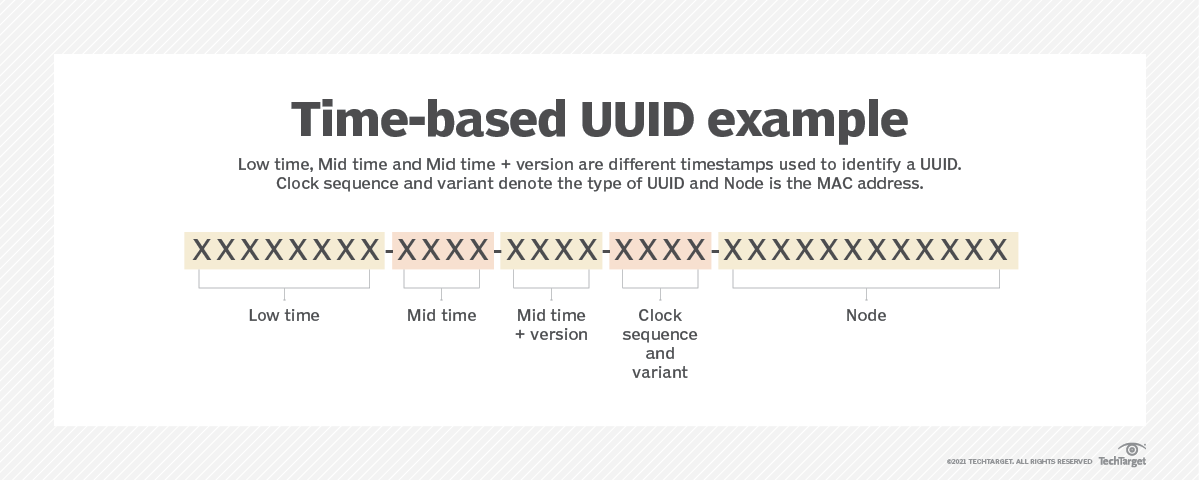

In [600]:
# vibo: выделяем имя пользователя и его UUID
data_logs['user_name'] = data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['serv_mess'].map(lambda x: x.split()[3])
data_logs['uuid'] = data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['serv_mess'].map(lambda x: x.split()[5])
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'][['data', 'time', 'serv_teg_inf', 'user_authenticator_number', 'user_name', 'uuid']]

,data,time,serv_teg_inf,user_authenticator_number,user_name,uuid
391,2023-02-13,21:49:48,User Authenticator,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
563,2023-02-13,22:01:24,User Authenticator,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
908,2023-02-14,23:53:33,User Authenticator,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
1088,2023-02-17,19:05:26,User Authenticator,1.0,YOUTUBE_plaY,56eb670a-4ed0-3009-9bc9-00d047fbaeff
1094,2023-02-17,19:07:53,User Authenticator,2.0,YOUTUBE_plaY,56eb670a-4ed0-3009-9bc9-00d047fbaeff
...,...,...,...,...,...,...
5033,2023-03-06,18:40:25,User Authenticator,6.0,Fredi,1ee24d02-4446-35e1-84c8-4b785c1bae33
5039,2023-03-06,18:42:27,User Authenticator,7.0,test_name_1,a101608a-3944-3398-a11e-16211546e19a
5060,2023-03-06,20:14:05,User Authenticator,8.0,amogoos,bb8d3a15-62ea-3dd7-8df8-776e0930f557
5066,2023-03-06,20:14:44,User Authenticator,9.0,amogoos,bb8d3a15-62ea-3dd7-8df8-776e0930f557


UUID привязан к имени пользователя

In [601]:
# vibo: суммарное количество аутентификаций пользователей за период
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['serv_mess']).size().sort_values(ascending=False)

serv_mess
 UUID of player testing1 is 4e9071c3-79ab-3a3a-ab83-2e04eacd6854            15
 UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        14
 UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             12
 UUID of player testing2 is 5e20431e-cf2a-314e-a557-c5525d567366             7
 UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259                  6
 UUID of player vibo is f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9                 6
 UUID of player Fredi is 1ee24d02-4446-35e1-84c8-4b785c1bae33                3
 UUID of player gggggg102 is d755a875-1b70-3b66-bd19-b2b67e593159            3
 UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42                 3
 UUID of player LOLOTUK is 351abe30-df95-37d4-940e-b868831fc026              2
 UUID of player amogoos_red is 9f566d31-b9cd-3069-9068-967914755363          1
 UUID of player amogoos_red15050 is 90c58b0a-047b-3f41-a2eb-0b295facaf2a     1
 UUID of player test_name_1 is a101608a-39

In [602]:
# vibo: уникальные аутентифицированные пользователи
sorted(list(data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['user_name'].unique()))

['Fredi',
 'LOLOTUK',
 'YOUTUBE_plaY',
 'amogoos',
 'amogoos_red',
 'amogoos_red15050',
 'gggggg102',
 'rex',
 'test_name_1',
 'testing1',
 'testing2',
 'testing3',
 'testing4',
 'vibO',
 'vibo']

In [603]:
# vibo: количество уникальных аутентицированных пользователей
len(list(data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['user_name'].unique()))

15

In [604]:
# vibo: количество аутентификаций в группировке по пользователям
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['user_name']).size().sort_values(ascending=False)

user_name
testing1            15
YOUTUBE_plaY        14
amogoos             12
testing2             7
rex                  6
vibo                 6
Fredi                3
gggggg102            3
vibO                 3
LOLOTUK              2
amogoos_red          1
amogoos_red15050     1
test_name_1          1
testing3             1
testing4             1
dtype: int64

In [605]:
# vibo: количество аутентицикаций в день
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['data']).size()

data
2023-02-13      2
2023-02-14      1
2023-02-17      8
2023-03-03     11
2023-03-04      3
2023-03-05     17
2023-03-06     34
dtype: int64

In [606]:
# vibo: количество аутентификаций пользователей по дням с группировкой по пользователям
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['data', 'user_name'])[['user_name']].size()

data         user_name       
2023-02-13   vibO                 2
2023-02-14   vibO                 1
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         6
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         3
             amogoos              7
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 3
2023-03-06   Fredi                3
             amogoos              5
             gggggg102            2
             test_name_1          1
             testing1            14
             testing2             7
             testing3             1
             testing4             1
dtype: int64

### Оператор сервера

Продолжаем выделять информацию из дополнительного сообщения сервера, посмотрим, кто из пользователей был наделен правом оператора сервера.

In [608]:
data_logs['is_op'] = data_logs['serv_mess'].dropna().map(lambda x: 'server operator' in x).to_frame()
data_logs[data_logs['is_op'] == True][['data', 'time', 'serv_mess', 'is_op']]

,data,time,serv_mess,is_op
398,2023-02-13,21:57:06,Made vibO a server operator,True
1097,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1152,2023-02-17,19:45:04,Made vibo a server operator,True
1376,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1620,2023-03-03,19:42:04,Made rex a server operator,True
3163,2023-03-05,12:57:45,Made amogoos a server operator,True
3188,2023-03-05,13:13:49,Made amogoos a server operator,True
3562,2023-03-05,15:33:25,Made testing1 a server operator,True
3901,2023-03-06,20:26:21,Made testing2 a server operator,True
4245,2023-03-06,21:04:44,Made testing3 a server operator,True


In [609]:
ind_op = data_logs[data_logs['is_op'] == True].index
ind_op

Int64Index([398, 1097, 1152, 1376, 1620, 3163, 3188, 3562, 3901, 4245, 4958,
            4981],
           dtype='int64')

In [610]:
data_logs[data_logs.index.isin(ind_op)][['data', 'time', 'serv_mess', 'is_op']]

,data,time,serv_mess,is_op
398,2023-02-13,21:57:06,Made vibO a server operator,True
1097,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1152,2023-02-17,19:45:04,Made vibo a server operator,True
1376,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1620,2023-03-03,19:42:04,Made rex a server operator,True
3163,2023-03-05,12:57:45,Made amogoos a server operator,True
3188,2023-03-05,13:13:49,Made amogoos a server operator,True
3562,2023-03-05,15:33:25,Made testing1 a server operator,True
3901,2023-03-06,20:26:21,Made testing2 a server operator,True
4245,2023-03-06,21:04:44,Made testing3 a server operator,True


In [611]:
# vibo: выделим имя оператора сервера
data_logs['op_name'] = data_logs[data_logs.index.isin(ind_op)]['serv_mess'].map(lambda x: x.split()[1])
data_logs[data_logs['is_op'] == True][['data', 'time', 'serv_mess', 'is_op', 'op_name']]

,data,time,serv_mess,is_op,op_name
398,2023-02-13,21:57:06,Made vibO a server operator,True,vibO
1097,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True,YOUTUBE_plaY
1152,2023-02-17,19:45:04,Made vibo a server operator,True,vibo
1376,2023-03-03,18:03:24,Made LOLOTUK a server operator,True,LOLOTUK
1620,2023-03-03,19:42:04,Made rex a server operator,True,rex
3163,2023-03-05,12:57:45,Made amogoos a server operator,True,amogoos
3188,2023-03-05,13:13:49,Made amogoos a server operator,True,amogoos
3562,2023-03-05,15:33:25,Made testing1 a server operator,True,testing1
3901,2023-03-06,20:26:21,Made testing2 a server operator,True,testing2
4245,2023-03-06,21:04:44,Made testing3 a server operator,True,testing3


In [612]:
# vibo: уникальные пользователи, получившие права оператора сервера
sorted(list(data_logs[data_logs['is_op'] == True]['op_name'].unique()))

['Fredi',
 'LOLOTUK',
 'YOUTUBE_plaY',
 'amogoos',
 'rex',
 'testing1',
 'testing2',
 'testing3',
 'vibO',
 'vibo']

In [613]:
# vibo: количество уникальных пользователей, получивших права оператора сервера
len(list(data_logs[data_logs['is_op'] == True]['op_name'].unique()))

10

In [614]:
# vibo: когда были выданы права администратора
data_logs[data_logs['is_op'] == True].groupby(['data', 'time', 'op_name'])[['op_name']].size()

data         time      op_name     
2023-02-13   21:57:06  vibO            1
2023-02-17   19:10:02  YOUTUBE_plaY    1
             19:45:04  vibo            1
2023-03-03   18:03:24  LOLOTUK         1
             19:42:04  rex             1
2023-03-05   12:57:45  amogoos         1
             13:13:49  amogoos         1
             15:33:25  testing1        1
2023-03-06   14:49:00  Fredi           1
             18:01:36  Fredi           1
             20:26:21  testing2        1
             21:04:44  testing3        1
dtype: int64

### Переписка игроков

In [619]:
data_logs[data_logs['serv_teg_inf'] == 'Async Chat Thread'][['data', 'time', 'serv_teg_inf', 'serv_mess']]

,data,time,serv_teg_inf,serv_mess
1146,2023-02-17,19:41:22,Async Chat Thread,[Not Secure] <vibo> привет!!!
1147,2023-02-17,19:41:54,Async Chat Thread,[Not Secure] <vibo> ты можешь выдать мне прав...
1148,2023-02-17,19:42:08,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> да да
1150,2023-02-17,19:43:23,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> всё дал
1157,2023-02-17,19:45:47,Async Chat Thread,[Not Secure] <vibo> спасибо! все получилось
1162,2023-02-17,19:48:23,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> давй пвп
1163,2023-02-17,19:48:36,Async Chat Thread,[Not Secure] <vibo> давай
1166,2023-02-17,19:49:04,Async Chat Thread,[Not Secure] <vibo> ты готов?
1184,2023-02-17,20:05:41,Async Chat Thread,[Not Secure] <YOUTUBE_plaY> что будем делать
1185,2023-02-17,20:07:01,Async Chat Thread,[Not Secure] <vibo> я убрал лаву


### А что еще?

In [621]:
data_logs

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,user_is_authenticate,user_name,uuid,is_op,op_name
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,INFO,Server thread,amogoos joined the game,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5079,2023-03-06,20:21:46,INFO,Server thread,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5080,2023-03-06,20:57:04,INFO,Server thread,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5081,2023-03-06,21:02:46,INFO,Server thread,amogoos lost connection: Disconnected,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN


Информации в `serv_mess` много, вот, например, что можно:
* вывести время загрузки сервера от старта до метки `Done` (например, `66.075s`);
* найти время работы сервера (между `Starting minecraft server` и `Stopping server`);
* найти время игры каждого пользователя (`vibO joined the game` и `vibO left the game`);
* найти сколько раз игрок погибал и по какой причине (застрелен скелетом, утонул и т.д.);
* найти время 'жизни' персонажа в реальном времение между началом игры и смертью;
* найти кто к кому телепортируется и таким образом строить граф взаимодействия между игроками.

Также можно продолжить поиск информации уже по установленным плагинам (столбец `plug_mess`).